name: Marco Giunta

# Exercise 1: Scotland Lakes

In [1]:
library("tidyverse")

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## 1.0) Loading the data
First of all we load the data. Since I'm too lazy to manually input it and still pretty new to R I wrote a short python script to generate everything for us; by executing it the working folder will be populated with one csv file for each column of the dataframe.

In [2]:
#this executes a system command which one may type manually in the terminal
system("python laghi_Scozia_helper_script.py")

[1] 0

In [3]:
#we can now actually read the data
scottish.lakes.volume <- read.csv("Volume.csv")
scottish.lakes.area <- read.csv("Area.csv")
scottish.lakes.length <- read.csv("Length.csv")
scottish.lakes.maxdepth <- read.csv("Max-depth.csv")
scottish.lakes.meandepth <- read.csv("Mean-depth.csv")

#we print one as an example
print(str(scottish.lakes.volume))
scottish.lakes.volume

'data.frame':	13 obs. of  2 variables:
 $ Loch  : chr  "Ness" "Lomond" "Morar" "Tay" ...
 $ Volume: num  7.45 2.6 2.3 1.6 1.2 1.09 1.08 1.07 0.97 0.79 ...
NULL


Loch,Volume
<chr>,<dbl>
Ness,7.45
Lomond,2.60
Morar,2.30
Tay,1.60
Awe,1.20
Maree,1.09
Ericht,1.08
Lochy,1.07
Rannoch,0.97


In [4]:
#Thanks to str(...) we notice that the objects we just created are actually dataframes even though we want named vectors; 
#to fix this we create new vectors out of the above dataframes and set their names using the setNames function, where we
#once again exploit the dataframes to create the chr vector containing the names to be given to each num value

lake_names <- scottish.lakes.volume[[1]]#notice the [[]] operator, needed to extract a chr vector instead of a dataframe

volume <- setNames(scottish.lakes.volume[[2]],lake_names) #same here: [[]] is needed to obtain a num vector
area <- setNames(scottish.lakes.area[[2]],lake_names)
length <- setNames(scottish.lakes.length[[2]],lake_names)
maxdepth <- setNames(scottish.lakes.maxdepth[[2]],lake_names)
meandepth <- setNames(scottish.lakes.meandepth[[2]],lake_names)

#we print one as an example
print(str(volume))
volume

 Named num [1:13] 7.45 2.6 2.3 1.6 1.2 1.09 1.08 1.07 0.97 0.79 ...
 - attr(*, "names")= chr [1:13] "Ness" "Lomond" "Morar" "Tay" ...
NULL


Ness  Lomond   Morar     Tay     Awe   Maree  Ericht   Lochy Rannoch   Shiel 
   7.45    2.60    2.30    1.60    1.20    1.09    1.08    1.07    0.97    0.79 
Katrine  Arkaig    Shin 
   0.77    0.75    0.35

In [5]:
#We can now create the final dataframe starting from the named vectors. Notice that data.frame(...) automatically uses
#the names inside each vector to create the dataframe index instead of a separate "Loch" column
scottish.lakes <- data.frame(volume,area,length,maxdepth,meandepth)
column_names <- c("Volume (km^3)","Area (km^2)","Length (km)","Max depth (m)","Mean depth (m)")
scottish.lakes <- setNames(scottish.lakes,column_names)
scottish.lakes

,Volume (km^3),Area (km^2),Length (km),Max depth (m),Mean depth (m)
,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Ness,7.45,56.0,39.0,230,132.0
Lomond,2.60,71.0,36.0,190,37.0
Morar,2.30,27.0,18.8,310,87.0
Tay,1.60,26.4,23.0,150,60.6
Awe,1.20,39.0,41.0,94,32.0
Maree,1.09,28.6,20.0,114,38.0
Ericht,1.08,18.6,23.0,156,57.6
Lochy,1.07,16.0,16.0,162,70.0
Rannoch,0.97,19.0,15.7,134,51.0


In [6]:
#As we already noted the above doesn't contain a "Loch" column, encoding that information in the index column
#(more precisely: in the row names). It's easy to modify our dataframe in such a way as to put the Loch col. in line with the
#others via the row.names function; since I like having "Loch" as the row names column I'm just going to create another dataframe.

#print(row.names(scottish.lakes))
scottish.lakes_loch_col <- scottish.lakes
scottish.lakes_loch_col$Loch <- row.names(scottish.lakes)
row.names(scottish.lakes_loch_col) <- NULL
scottish.lakes_loch_col <- scottish.lakes_loch_col[c("Loch",names(scottish.lakes))] #this moves the "Loch" col. to the left
scottish.lakes_loch_col

Loch,Volume (km^3),Area (km^2),Length (km),Max depth (m),Mean depth (m)
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Ness,7.45,56.0,39.0,230,132.0
Lomond,2.60,71.0,36.0,190,37.0
Morar,2.30,27.0,18.8,310,87.0
Tay,1.60,26.4,23.0,150,60.6
Awe,1.20,39.0,41.0,94,32.0
Maree,1.09,28.6,20.0,114,38.0
Ericht,1.08,18.6,23.0,156,57.6
Lochy,1.07,16.0,16.0,162,70.0
Rannoch,0.97,19.0,15.7,134,51.0


## Data analysis

### 1.1) min/max volume lake
Functions `min` and `max` may be trivially used to find the maximum and minimum volume values by feeding them `scottish.lakes["Volume (km^3)"]` as argument. To find which lake these value correspond to we can either use `which.min`/`which.max` (which is the mathematical operation of $\text{argmin}$/$\text{argmax}$) to find the index of the minimum/maximum value or use logical indexing (other solutions may exist, of course; this are only two of the simplest).

In [7]:
#min
min.vol.value = min(scottish.lakes$`Volume (km^3)`)
min.vol.loch = row.names(scottish.lakes)[which.min(scottish.lakes$`Volume (km^3)`)]
#min.vol.loch = scottish.lakes_loch_col[scottish.lakes["Volume (km^3)"] == min.vol.value][1] #this is equivalent but longer to 
#write and a bit harder to read

message = c("The minimum lake volume is",min.vol.value,"km^3 and is achieved by Loch",min.vol.loch)
print(paste(message, collapse=" ", sep=" ")) #collapse is needed to achieve a single string instead of a chr vector

#max
max.vol.value = max(scottish.lakes$`Volume (km^3)`)
max.vol.loch = row.names(scottish.lakes)[which.max(scottish.lakes$`Volume (km^3)`)]
#max.vol.loch = scottish.lakes_loch_col[scottish.lakes["Volume (km^3)"] == max.vol.value][1] #this is equivalent but longer to 
#write and a bit harder to read

message = c("The maximum lake volume is",max.vol.value,"km^3 and is achieved by Loch",max.vol.loch)
print(paste(message, collapse=" ", sep=" "))

[1] "The minimum lake volume is 0.35 km^3 and is achieved by Loch Shin"
[1] "The maximum lake volume is 7.45 km^3 and is achieved by Loch Ness"


### 1.2) Arranging rows by area value
We can use the `arrange` function from library `dplyr` to achieve the desired result.

In [8]:
#I'm changing the column names to a slightly less human-readable format to make typing/using functions easier.
names(scottish.lakes) <- c("volume","area","length","maxdepth","meandepth")
scottish.lakes_sorted_by_area <- arrange(scottish.lakes, desc(area)) #desc is needed to have descending order.
#Technically it's not necessary to sort by descending area, but it's easier to subset with [1] and [2] than 
#it is with [length(..)] or something similar

message <- c("The two lakes with the largest areas are",row.names(scottish.lakes_sorted_by_area)[1],
             "and",row.names(scottish.lakes_sorted_by_area)[2],"with area values",
             scottish.lakes_sorted_by_area$area[1],"and",scottish.lakes_sorted_by_area$area[2],"km^2 respectively")

print(paste(message, sep=" ", collapse=" "))

[1] "The two lakes with the largest areas are Lomond and Ness with area values 71 and 56 km^2 respectively"


### 1.3) Summing area values
To find the total area of Scotland covered by water we straightforwardly apply the sum function.

In [9]:
message <- c("The total area of Scotland covered by water is",sum(scottish.lakes$area),"km^2.")
print(paste(message, sep=" ", collapse=" "))

[1] "The total area of Scotland covered by water is 372 km^2."


# Exercise 2: oil prices

## 2.1) Loading the data
First we create a dataframe by downloading it directly from the web (I slightly modified the provided URL to make this possible)

In [10]:
url <- "https://drive.google.com/u/0/uc?id=1cUQ8d0kDOw2lmzMAHIPglpdcnHy4GgF3&export=download"
oil <- read.csv(url, skip=1) #the first row in the original document is just a comment and therefore we ignore it
oil

Entity,Code,Year,OilPrice
<chr>,<chr>,<int>,<dbl>
World,OWID_WRL,1861,0.49
World,OWID_WRL,1862,1.05
World,OWID_WRL,1863,3.15
World,OWID_WRL,1864,8.06
World,OWID_WRL,1865,6.59
World,OWID_WRL,1866,3.74
World,OWID_WRL,1867,2.41
World,OWID_WRL,1868,3.63
World,OWID_WRL,1869,3.64


## Data analysis

### 2.2) Plot of oil price vs year

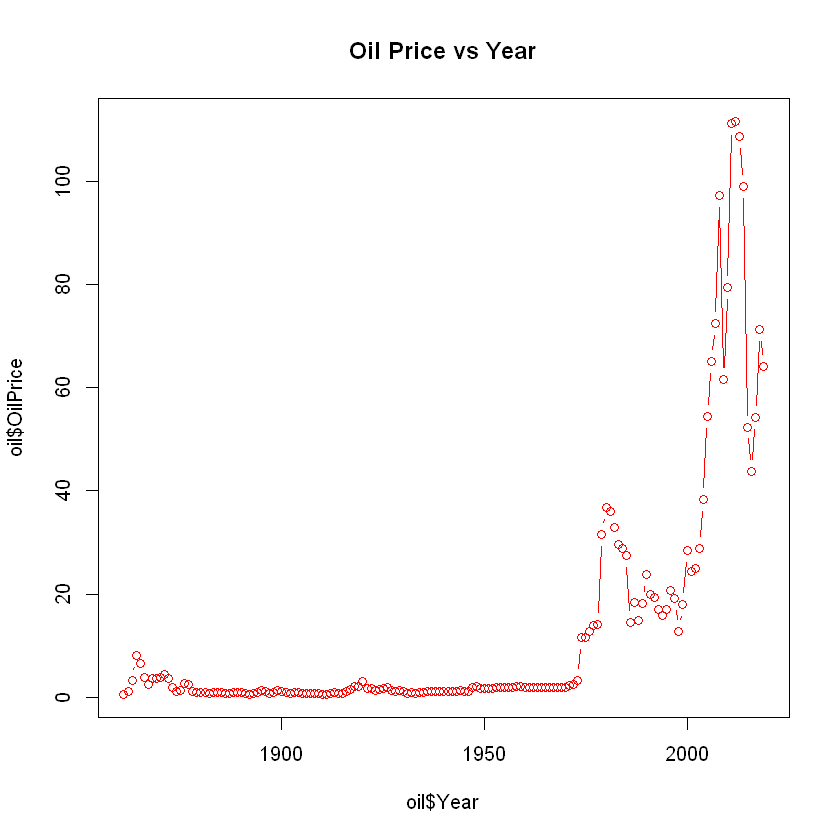

In [11]:
plot(oil$Year,oil$OilPrice,type="b",col="red")
title("Oil Price vs Year")

### 2.3) Maximum price ever reached
We employ the strategy used in the Loch exercise; namely, we use a combination of the `max` and `which.max` functions to find our answer.

In [12]:
message <- c("The highest price was reached in",oil$Year[which.max(oil$OilPrice)],
             "and it amounted to",max(oil$OilPrice),"dollars")
print(paste(message, sep=" ", collapse=" "))

[1] "The highest price was reached in 2012 and it amounted to 111.669702380952 dollars"


### 2.4) Forward derivative computation & plot
The `diff` function is all we need! The only detail to be addressed with care is that `diff` yields a vector which is one element shorter than `oil$Year`; a simple solution is to padd our new vector with a 0 at the beginning (we choose this value at this position because it approximately makes sense if we inspect the previous plot, but this is an arbitrary decision nonetheless).

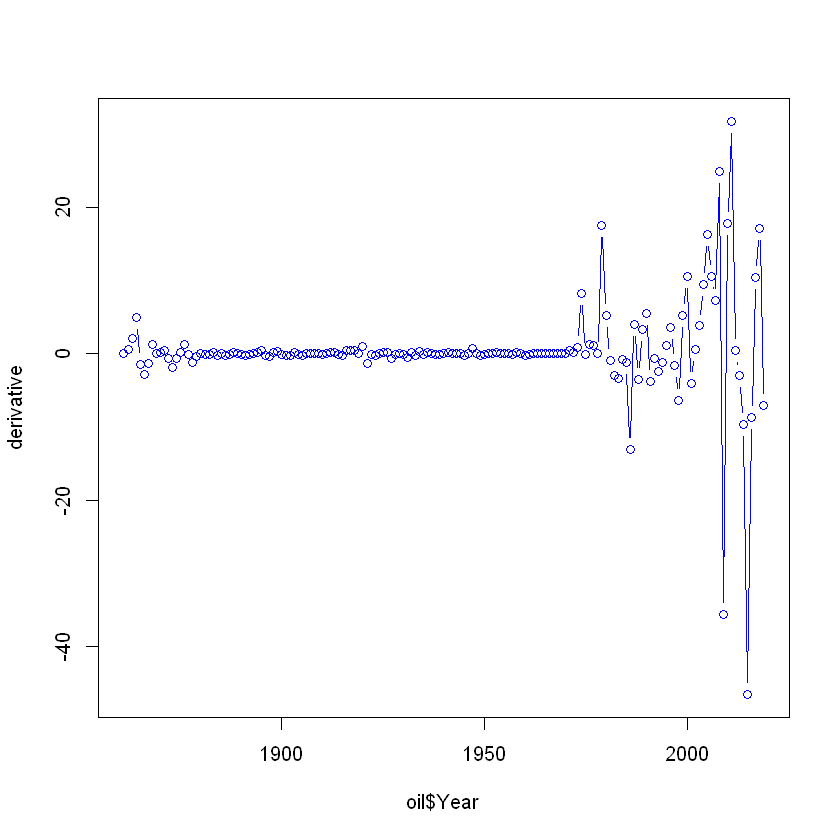

In [13]:
derivative <- c(0,diff(oil$OilPrice))
plot(oil$Year,derivative,type="b",col="blue")

# Exercise 3: World coal production

## 3.1) Loading the data
This time we want to create a tibble object instead of a dataframe; to import the data, therefore, we have at least to possible ways to proceed:
- we import the data using `read.csv` in a dataframe as above and then convert to a tibble using `tibble`;
- we skip the dataframe as an intermidiate step and immediately create a tibble using `read_csv`.

Either is fine.

In [14]:
url <- "https://drive.google.com/u/0/uc?id=10kgRQGKEC81QoVW9kj8goNzzyLcT0xld&export=download" #once again: slightly modified
#coal <- tibble(read.csv(url)) #alternative 1
coal <- read_csv(url) #alternative 2. Notice that is somewhat smarter, in that with no further arguments if we import with
#read_csv the last column's name is automatically formatted in the correct way (whitespaces are left as in the original csv,
#whereas read.csv replaces them with .).
coal


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Entity = col_character(),
  Code = col_character(),
  Year = col_double(),
  `Coal production (TWh)` = col_double()
)




Entity,Code,Year,Coal production (TWh)
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0
Afghanistan,AFG,1906,0
Afghanistan,AFG,1907,0
Afghanistan,AFG,1908,0


In [15]:
#we modify the first & last columns' names to make typing easier
names(coal)[c(1,4)] <- c("Country","TWh")
coal

Country,Code,Year,TWh
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0
Afghanistan,AFG,1906,0
Afghanistan,AFG,1907,0
Afghanistan,AFG,1908,0


## Data analysis

### 3.2.1) Number & occurrences of available countries
The `unique` function applied to the Country column trivially lets us find unique countries and therefore their number via the `length` function.    
Computing the number of entries associated to each country is slightly more involved, and of the many possible solutions to be found online I show two. First solution: we use the `table` function to create a table object - which contains the couples (country, number of occurrences) - which we cast to array; then we recover the country names we just threw away by re-assigning them thanks to the unique dataframe.

In [16]:
countries <- unique(coal$Country)
n.countries <- length(countries) #I find it useful here to be a little redundant with variables 
message <- c("The number of unique contries whose data is available is",n.countries)
print(paste(message,sep=" ",collapse=" "))
#countries

[1] "The number of unique contries whose data is available is 200"


In [17]:
#this table tells us how many time each country appears in the Country column of the coal tibble
n.occurrences <- table(coal$Country)
n.occurrences


                     Afghanistan                           Africa 
                             117                              104 
                         Albania                          Algeria 
                             117                               65 
                  American Samoa              Antigua and Barbuda 
                              37                               37 
                       Argentina                          Armenia 
                              65                               25 
                           Aruba                 Asia and Oceania 
                              31                              117 
                    Asia Pacific                        Australia 
                              39                              104 
                         Austria                          Bahamas 
                              65                               37 
                        Barbados                          Bel

In [18]:
#we now reassign this variable 
n.occurrences <- as.numeric(n.occurrences) #it now is a numeric array containing the numeric part only
#since we lost the names we name every element in our new array by exploiting the fact that unique() earlier gave us exactly
#what we need now (both table and unique sorted by alphabetical order)
names(n.occurrences) <- countries
n.occurrences

#the result should be the same one can obtain in python by using:
#import pandas as pd
#pd.read_csv(url).groupby("Entity").nunique().Year

Afghanistan                           Africa 
                             117                              104 
                         Albania                          Algeria 
                             117                               65 
                  American Samoa              Antigua and Barbuda 
                              37                               37 
                       Argentina                          Armenia 
                              65                               25 
                           Aruba                     Asia Pacific 
                              31                              117 
                Asia and Oceania                        Australia 
                              39                              104 
                         Austria                          Bahamas 
                              65                               37 
                        Barbados                          Belgium 
                              37                               65 
                          Belize                            Benin 
                              37                               37 
                         Bermuda                           Bhutan 
                              37                               37 
          Bosnia and Herzegovina                         Botswana 
                              25                              117 
                          Brazil           British Virgin Islands 
                             104                               37 
                        Bulgaria                     Burkina Faso 
                             104                               37 
                           Burma                          Burundi 
                             117                              117 
                             CIS                         Cambodia 
                              37                               37 
                        Cameroon                           Canada 
                             104                               37 
                      Cape Verde                   Cayman Islands 
                              37                               37 
        Central African Republic        Central and South America 
                             117                               65 
                           Chile                            China 
                             104                               39 
                        Colombia                          Comoros 
                             104                               37 
                    Cook Islands                       Costa Rica 
                              37                               15 
                            Cuba                          Czechia 
                              15                               39 
                  Czechoslovakia     Democratic Republic of Congo 
                              93                               95 
                         Denmark                         Djibouti 
                              65                               37 
                        Dominica               Dominican Republic 
                              37                               37 
                           EU-28                      El Salvador 
                              18                               11 
               Equatorial Guinea                          Eritrea 
                              23                              117 
                        Eswatini                         Ethiopia 
                              18                              117 
                         Eurasia                           Europe 
                             117                              104 
                  Europe (other)                   Faeroe Islands 
                              39                               37 
 

Second solution: we can group our "coal" dataframe by country and then use the count function to obtain a dataframe (instead of a named vector) which contains two columns: the countries and the number of occurrences.

In [19]:
n.occurrences2 <- coal %>% group_by(Country) %>% count()
n.occurrences2

Country,n
<chr>,<int>
Afghanistan,117
Africa,104
Albania,117
Algeria,65
American Samoa,37
Antigua and Barbuda,37
Argentina,65
Armenia,25
Aruba,31


In [20]:
#how can we check whether these two methods yield the same result? One possible way is to count how many TRUE elements there are in the boolean vector n.occurrences2 == n.occurrences;
#if there are as many true elements as there are unique countries then this means that every element of the logical vector is TRUE and therefore that these 2 vectors are indeed equal everywhere!
library("Matrix")
nnzero(n.occurrences2$n == n.occurrences) == n.countries


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack




[1] TRUE

### 3.2.2) Barplot

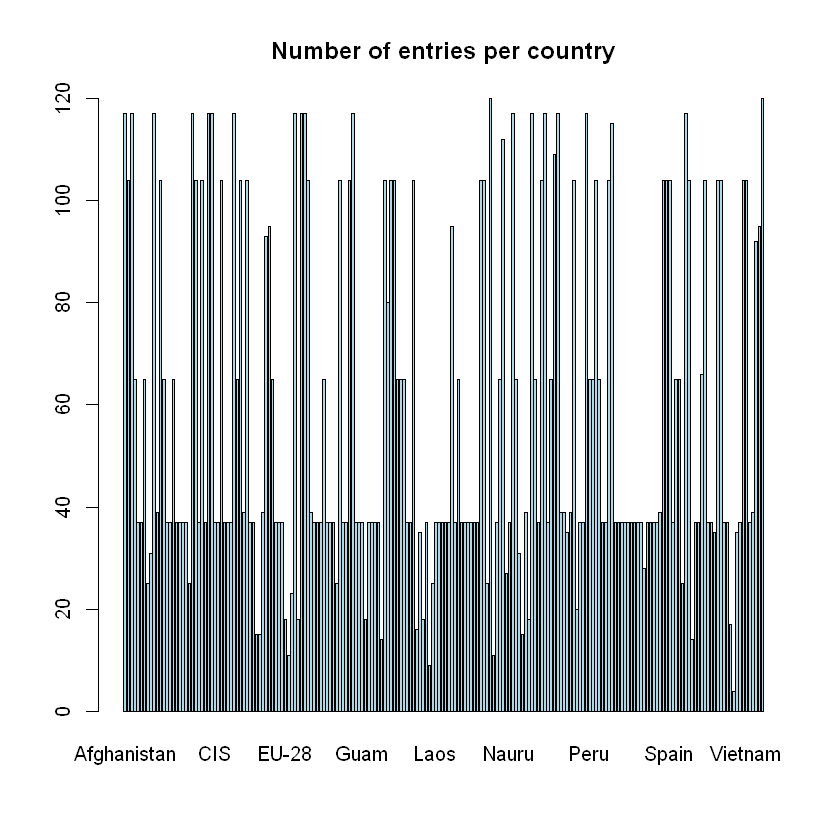

In [21]:
#once we have the named vectors of the count for each country we can trivially use the barplot function
barplot(n.occurrences, col="lightblue") #this isn't really a human readable plot...
title("Number of entries per country")

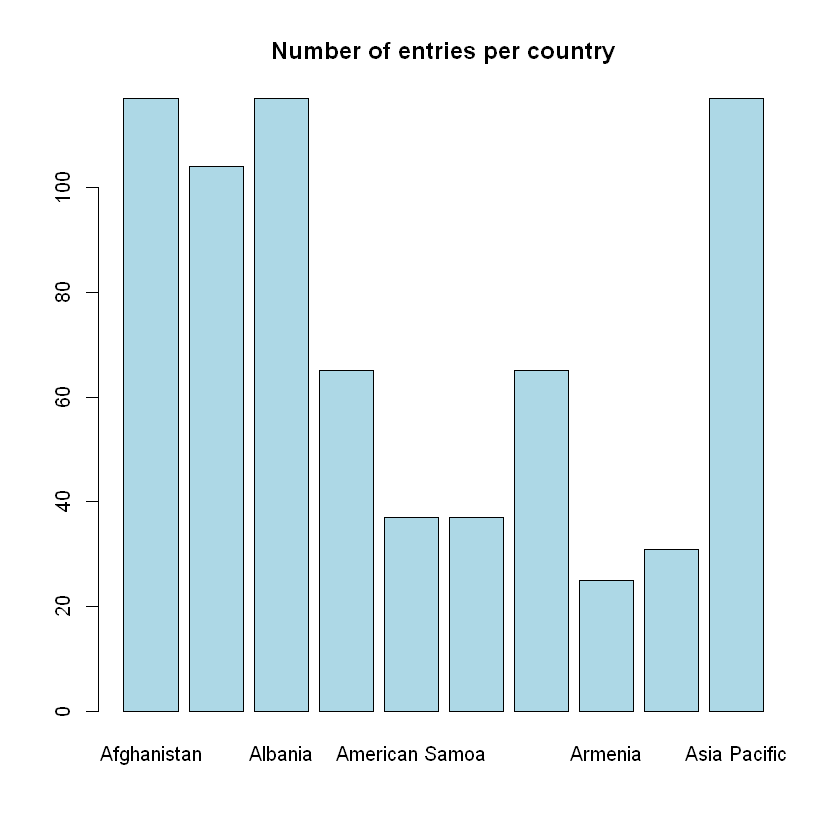

In [22]:
barplot(n.occurrences[1:10], col="lightblue")#with less countries it is much more readable
title("Number of entries per country")

### 3.3) Total production
We first select the years $\geq 1970$ with the help of logical indexing and save the result in a separate tibble (redundant but helpful step); after this we can explain how to compute the integrated production associated to each country.

In [23]:
indices <- coal$Year > 1969 #the boolean vector to be used to subset tibbles
coal.1970 <- coal[indices,] #watch out for that comma: without it R assumes we want to index the columns, which of course
#doesn't work

#coal.1970

Now we can actually determine the TWh produced by each country from 1970 to today. There are multiple ways to address this; here I'm proposing what I think to be the simplest (if somewhat inefficient) solution.    
We can create a named array such that each (name,value) pair represents each country and its cumulative TWh value (we already know each unique country present in the tibble), and by looping over this array we can populate it with the sum of all tibble rows associated with a particular country.

In [24]:
power <- rep(0, times=n.countries) #we initialize our array to n.countries zeros

for (i in 1:n.countries) {
    power[i] <- sum(coal.1970$TWh[coal.1970$Country == countries[i]])
}

names(power) <- countries
power

Afghanistan                           Africa 
                          83.102                        57836.224 
                         Albania                          Algeria 
                         101.490                            0.000 
                  American Samoa              Antigua and Barbuda 
                           0.000                            0.000 
                       Argentina                          Armenia 
                           0.000                            0.000 
                           Aruba                     Asia Pacific 
                           0.000                       690240.475 
                Asia and Oceania                        Australia 
                      685960.037                        83077.065 
                         Austria                          Bahamas 
                           0.000                            0.000 
                        Barbados                          Belgium 
                           0.000                            0.000 
                          Belize                            Benin 
                           0.000                            0.000 
                         Bermuda                           Bhutan 
                           0.000                            9.400 
          Bosnia and Herzegovina                         Botswana 
                         573.077                          221.976 
                          Brazil           British Virgin Islands 
                        1252.920                            0.000 
                        Bulgaria                     Burkina Faso 
                        2292.632                            0.000 
                           Burma                          Burundi 
                          73.596                            0.087 
                             CIS                         Cambodia 
                      100361.568                            0.000 
                        Cameroon                           Canada 
                           0.000                        16132.001 
                      Cape Verde                   Cayman Islands 
                           0.000                            0.000 
        Central African Republic        Central and South America 
                           0.000                        14685.155 
                           Chile                            China 
                           0.000                       459564.647 
                        Colombia                          Comoros 
                       14192.908                            0.000 
                    Cook Islands                       Costa Rica 
                           0.000                            0.000 
                            Cuba                          Czechia 
                           0.000                        12698.636 
                  Czechoslovakia     Democratic Republic of Congo 
                       10765.023                           20.214 
                         Denmark                         Djibouti 
                           0.000                            0.000 
                        Dominica               Dominican Republic 
                           0.000                            0.000 
                           EU-28                      El Salvador 
                      150743.350                            0.000 
               Equatorial Guinea                          Eritrea 
                           0.000                            0.000 
                        Eswatini                         Ethiopia 
                          67.186                            0.000 
                         Eurasia                           Europe 
                      161580.479                       149902.114 
                  Europe (other)                   Faeroe Islands 
                       11508.091                            0.000 
 

To see which countries are burning the most coal we can sort the "power" array in decreasing order, then pick its first 5 elements - excluding the first one, which is "World" and therefore is arguably to be excluded.

In [25]:
sorted_power <- sort(power,dec=TRUE)
top_5_countries_TWh <- sorted_power[2:6] #sorted_power[1] is the whole world, which isn't a single country
top_5_countries <- names(top_5_countries_TWh) #being a bit redundant with variables here

message <- c("The 5 countries with the most TWh produced are:",top_5_countries,"- with:",top_5_countries_TWh,
             "TWh respectively.")
print(paste(message,sep=" ",collapse=" "))

[1] "The 5 countries with the most TWh produced are: Asia Pacific Asia and Oceania China OECD North America - with: 690240.475 685960.037 459564.647 438441.381 244443.419 TWh respectively."


### 3.4) Plot of power vs time
Now that we know which 5 countries are the "winners" of the coal competition we can extract the relevant rows from the tibble and use them to plot the power produced vs time graph.      
To produce our desidered plot via `ggplot2` we first create a new smaller tibble, only containing the rows corresponding to the top 5 countries selected above (we can create this tibble in multiple ways, see below); then we graph a Years vs TWh plot using Country to produce the label of each time series.

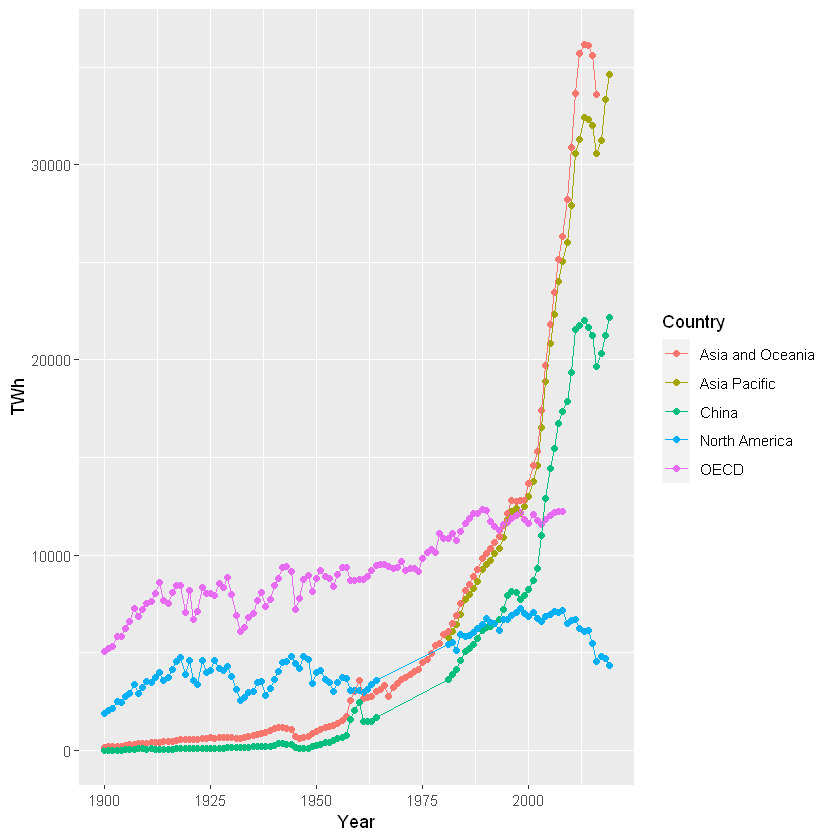

In [26]:
#To select rows where Country is equal to one of the elements of the top_5_countries array we can proceed in at least 3 ways:

#1) Logical indexing with the %in% operator, which checks whether a certain object is in another:
#coal_plot <- coal[coal$Country %in% top_5_countries,]

#2) "indirect" logical indexing, same as above but with the function is.element checking membership
#coal_plot <- coal[is.element(coal$Country, top_5_countries),]

#3) using filter instead of direct subsetting, with the operator %in% once again:
coal_plot <- filter(coal, Country %in% top_5_countries)
#and so on. It's trivial to check these commands produce the same output.

n_countries_to_plot <- 5

#coal_plot: Year on the x axis, TWh on the y axis, Country to produce time series label and color
g <- ggplot(data = coal_plot, aes(x = Year, y = TWh, col = Country)) + geom_point() + geom_line()
g

### 3.5) Plot of the cumulative sum of the World's power production vs time
Here we simply adapt code from part 3.3) and 3.4): we use `cumsum` + logical indexing to compute the desidered "World-only" dataframe.

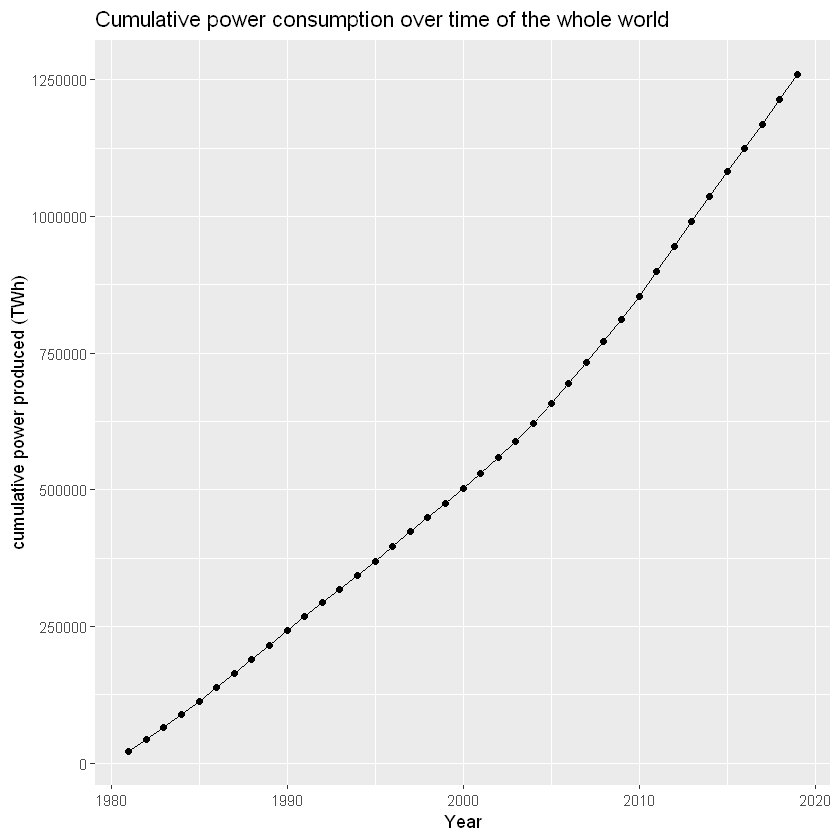

In [27]:
world <- coal[coal$Country == "World",] #watch out for the , !
world["cumsum"] <- cumsum(world$TWh)

g <- ggplot(data = world, aes(x = Year, y = cumsum))
g <- g + geom_point()
g <- g + geom_line()
g <- g + labs(x = "Year", y = "cumulative power produced (TWh)")
g <- g + ggtitle("Cumulative power consumption over time of the whole world")
g

# Exercise 4: COVID-19 vaccinations

## Loading the data (part 1)

In [28]:
#url <- "https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations-by-manufacturer.csv"
#it's easier if we use the raw data, i.e. use the url pointing to a web page containing only the desiderd csv
url <- "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv"
covid <- read_csv(url)
covid


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  location = col_character(),
  date = col_date(format = ""),
  vaccine = col_character(),
  total_vaccinations = col_double()
)




location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<dbl>
Chile,2020-12-24,Pfizer/BioNTech,420
Chile,2020-12-25,Pfizer/BioNTech,5198
Chile,2020-12-26,Pfizer/BioNTech,8338
Chile,2020-12-27,Pfizer/BioNTech,8649
Chile,2020-12-28,Pfizer/BioNTech,8649
Chile,2020-12-29,Pfizer/BioNTech,8649
Chile,2020-12-30,Pfizer/BioNTech,8649
Chile,2020-12-31,Pfizer/BioNTech,8649
Chile,2021-01-01,Pfizer/BioNTech,8649


## Data analysis (part 1)

### 4.1) Filtering the data about Italy
We use the `filter` function to extract the relevant rows (logical indexing is a solid alternative).

In [29]:
#since we'll have to repeat this analysis for Germany and the US it's a good idea to write some functions
extract_location = function(df, loc) {filter(df, location == loc)}

covid.ita <- extract_location(covid, "Italy") #no function alternative: filter(covid, location == "Italy")
#covid.ita <- covid[covid$location == "Italy",] is a simple (still no-function) alternative
covid.ita

location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<dbl>
Italy,2020-12-27,Pfizer/BioNTech,7152
Italy,2020-12-28,Pfizer/BioNTech,8573
Italy,2020-12-29,Pfizer/BioNTech,9577
Italy,2020-12-30,Pfizer/BioNTech,14303
Italy,2020-12-31,Pfizer/BioNTech,39775
Italy,2021-01-01,Pfizer/BioNTech,50826
Italy,2021-01-02,Pfizer/BioNTech,89329
Italy,2021-01-03,Pfizer/BioNTech,124462
Italy,2021-01-04,Pfizer/BioNTech,193091


### 4.2) Plot number of vaccines given each day for each vaccine manufacturer
Here it suffices to recycle the ggplot2 code from above; we split vaccine manufacturers using logical indexing/filter in the same way we did above.

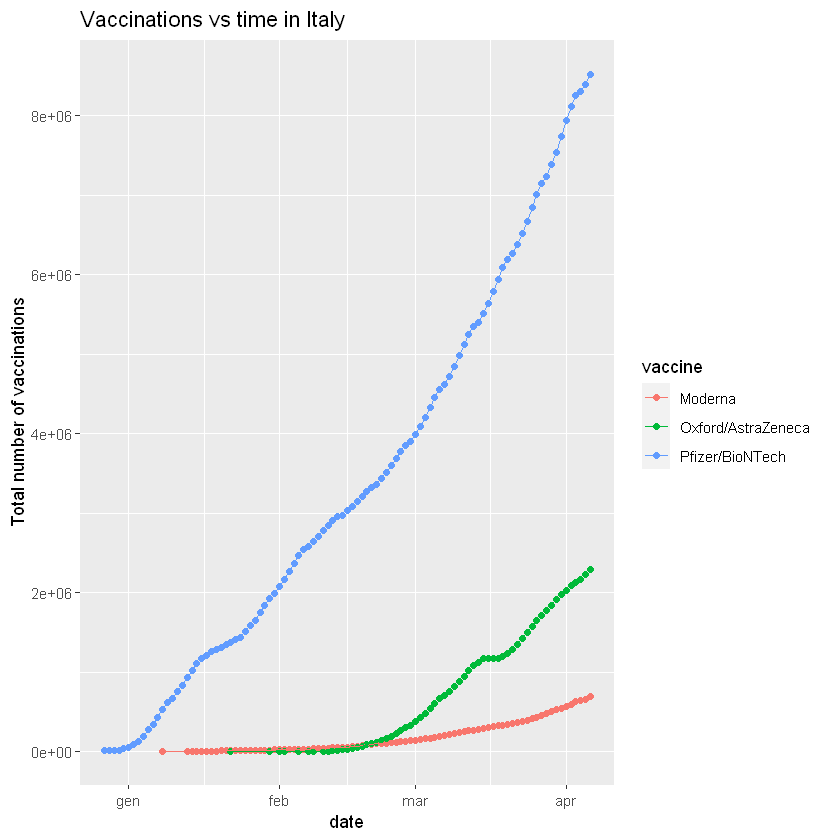

In [30]:
plot_vaccine_manufacturers <- function(df, loc) {
    #we first create a smaller dataframe with location equal to the given country...
    df.loc <- filter(df, location == loc)
    #...then we plot this new dataframe using ggplot2
    g <- ggplot(data = df.loc, aes(x = date, y = total_vaccinations, col = vaccine)) + geom_point() + geom_line()
    g <- g + labs(x = "date", y = "Total number of vaccinations")
    g <- g + ggtitle(sprintf("Vaccinations vs time in %s",loc))
    g
}

plot_vaccine_manufacturers(covid, "Italy")

### 4.3) Plot the total number of vaccines per day in Italy
To perform the aforementioned plot it suffices to modify slightly what was done in the previous exercise - namely, we need to consider (via a sum) the number of vaccines done each day irrespective of their manufacturer.     
To achieve this we rewrite the `plot_vaccine_manufacturers` function by creating a different "intermediate" dataframe unsing the `aggregate` function, which lets us split the data into subsets of vaccines with the same date and then apply the `sum` function.

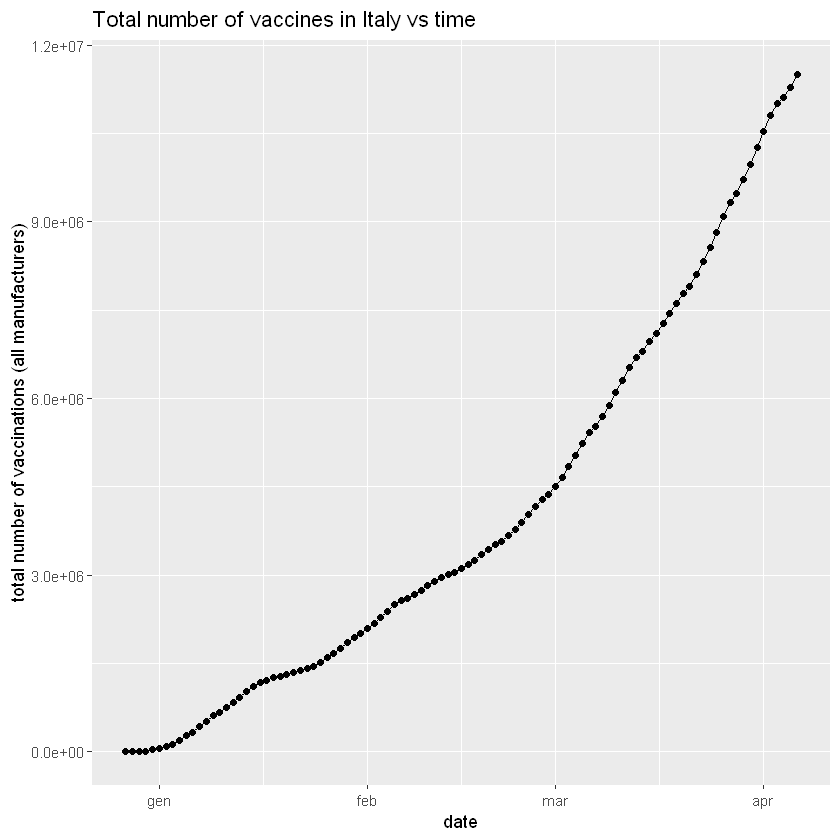

In [31]:
plot_total_number_of_vaccinations <- function(df, loc) {
    #dataframe relative to that location
    df.loc <- filter(df, location == loc)
    #dataframe containing the variable "total number of vaccinations", which is the sum of the total_vaccinations column grouped by date
    df.tot_n <- aggregate(df.loc$total_vaccinations, by = list(df.loc$date), FUN = sum)
    #we rename columns to make typing their names easier
    names(df.tot_n) <- c("date","tot_n_vac")
    
    #now we can plot as usual
    g <- ggplot(data = df.tot_n, aes(x = date, y = tot_n_vac)) + geom_point() + geom_line()
    g <- g + labs(x = "date", y = "total number of vaccinations (all manufacturers)") + ggtitle(sprintf("Total number of vaccines in %s vs time",loc))
    g
}

plot_total_number_of_vaccinations(covid, "Italy")
#metti confronto con groupby per sicurezza ihih

### 4.4) Repeat the analysis for Germany and the US
Since we defined a function in each of the previous exercises (points 4.1, 4.2, 4.3) it suffices to call them again with different arguments.

In [32]:
#point 4.1) for Germany
covid.germany <- extract_location(covid, "Germany")
covid.germany

location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<dbl>
Germany,2020-12-27,Moderna,0
Germany,2020-12-27,Oxford/AstraZeneca,0
Germany,2020-12-27,Pfizer/BioNTech,23988
Germany,2020-12-28,Moderna,0
Germany,2020-12-28,Oxford/AstraZeneca,0
Germany,2020-12-28,Pfizer/BioNTech,42373
Germany,2020-12-29,Moderna,0
Germany,2020-12-29,Oxford/AstraZeneca,0
Germany,2020-12-29,Pfizer/BioNTech,90940


In [33]:
#point 4.1) for the US
covid.us <- extract_location(covid, "United States")
covid.us

location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<dbl>
United States,2021-01-12,Moderna,3835859
United States,2021-01-12,Pfizer/BioNTech,5488697
United States,2021-01-13,Moderna,4249795
United States,2021-01-13,Pfizer/BioNTech,6025872
United States,2021-01-15,Moderna,5122662
United States,2021-01-15,Pfizer/BioNTech,7153268
United States,2021-01-19,Moderna,6828561
United States,2021-01-19,Pfizer/BioNTech,8874811
United States,2021-01-20,Moderna,7239750


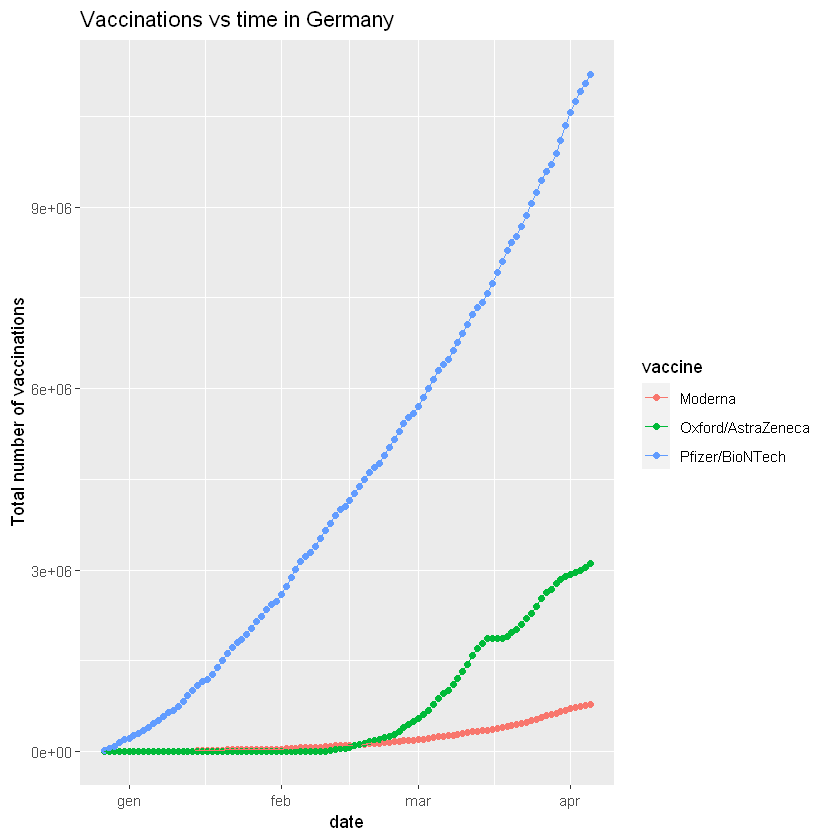

In [34]:
#point 4.2) for Germany
plot_vaccine_manufacturers(covid, "Germany")

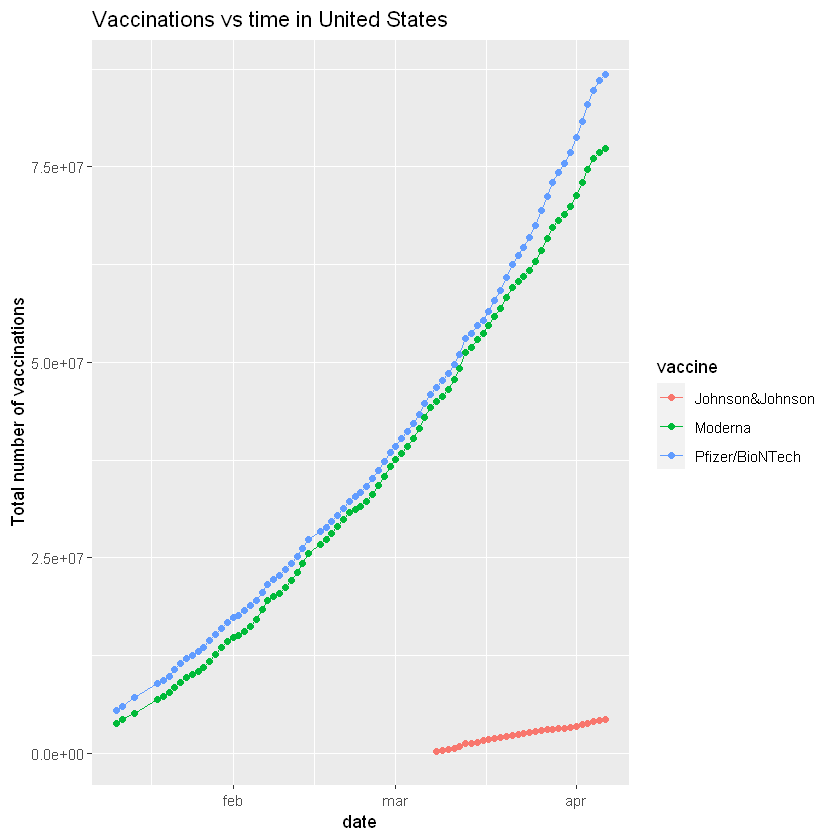

In [35]:
#point 4.2) for the US
plot_vaccine_manufacturers(covid, "United States")

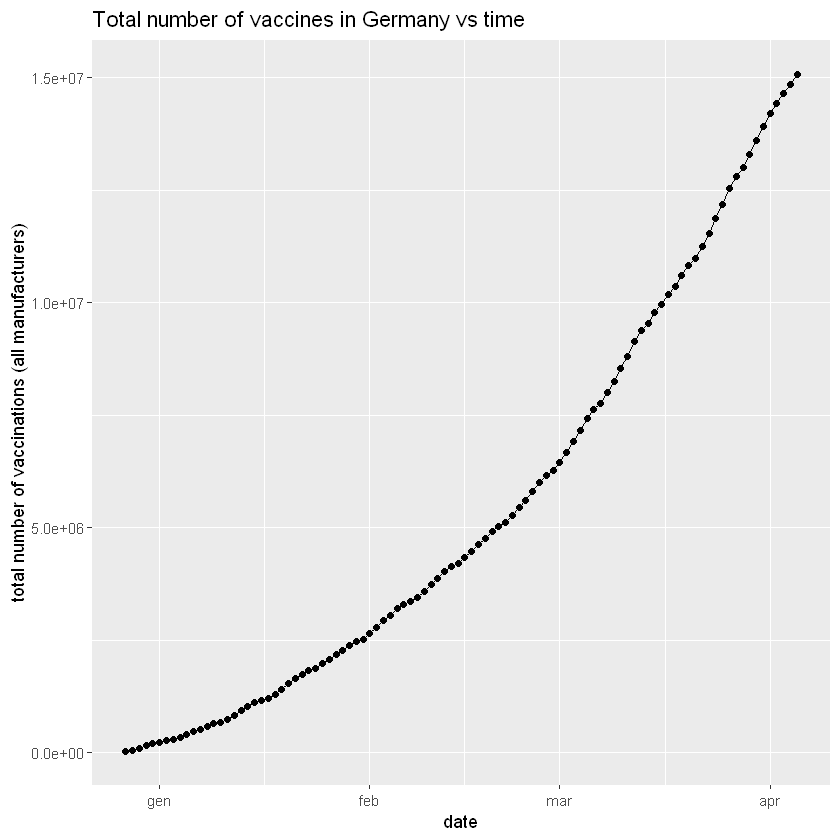

In [36]:
#point 4.3) for Germany
plot_total_number_of_vaccinations(covid, "Germany")

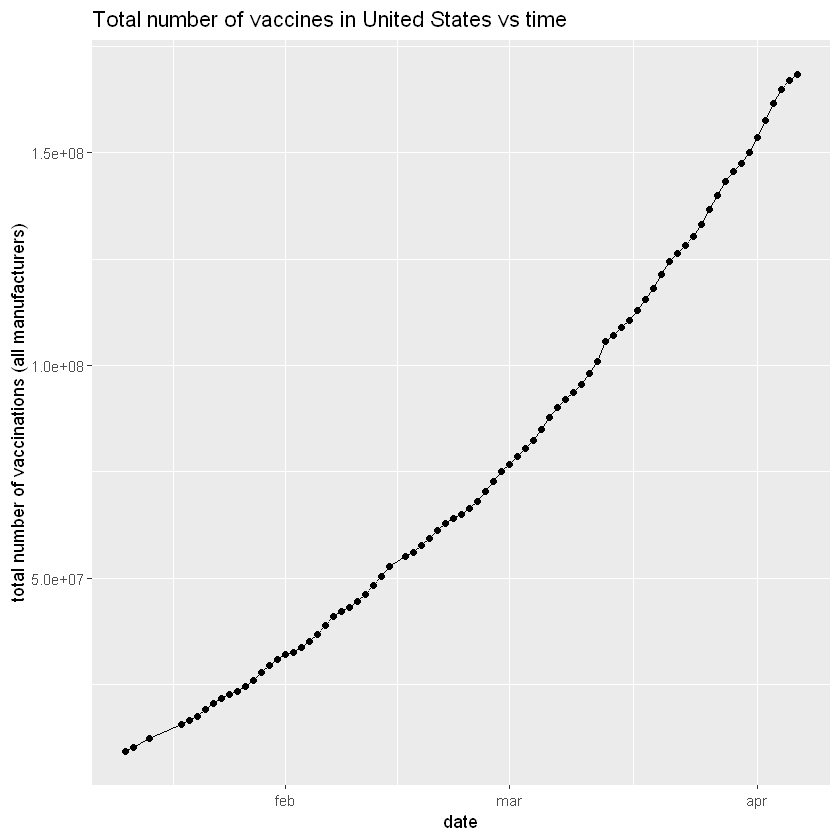

In [37]:
#point 4.3) for the US
plot_total_number_of_vaccinations(covid, "United States")

## Loading the data (part 2)

We load the data in a tibble in the usual way.

In [38]:
url <- "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
covid2 <- read_csv(url)
covid2


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double()
)




location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,0.00,0.00,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-28,8200,8200,NA,NA,1367,0.02,0.02,NA,35
Afghanistan,AFG,2021-03-01,NA,NA,NA,NA,1580,NA,NA,NA,41
Afghanistan,AFG,2021-03-02,NA,NA,NA,NA,1794,NA,NA,NA,46


## Data analysis (part 2)

### 4.1 bis) Plotting the daily number of vaccinations per million in Europe

We can extract data relevant to Europe using the same function defined above; then we create a smaller dataframe (containing only the 3 relevant columns) and plot it via ggplot2 (in exactly the same way as above).

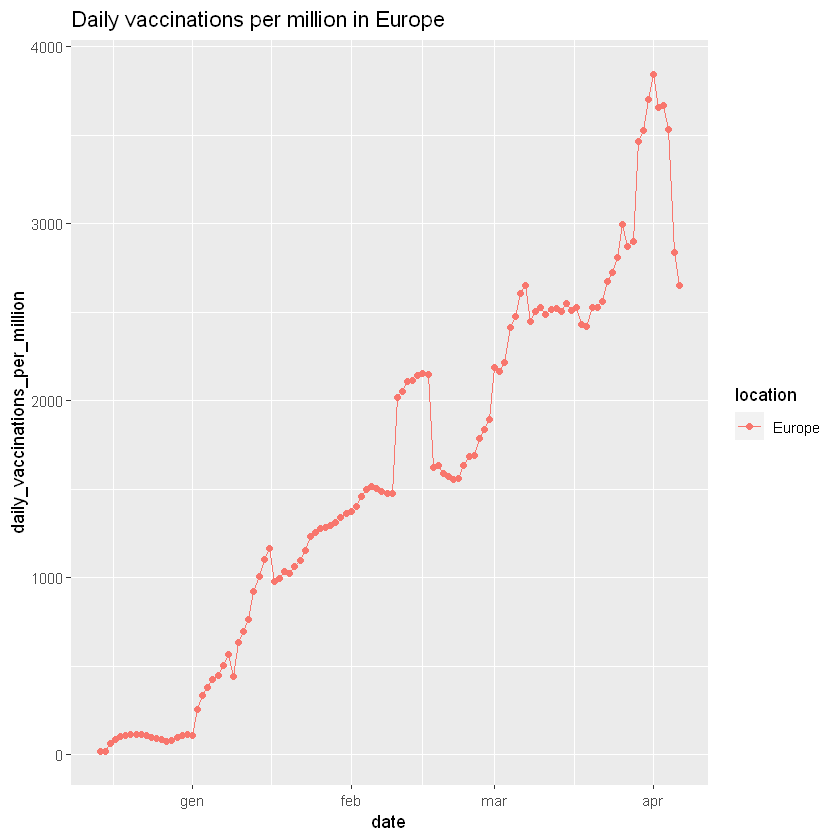

In [39]:
covid.eu <- extract_location(covid2, "Europe")
covid.eu.plot <- covid.eu[c("daily_vaccinations_per_million","date","location")]
#covid.eu.plot

#some rows contain NA, we can use the drop_na function from tidyr to remove them. If we don't ggplot will automatically, but it will give us a warning
g <- ggplot(data = drop_na(covid.eu.plot), aes(x = date, y = daily_vaccinations_per_million, col = location)) + geom_line() + geom_point() + ggtitle("Daily vaccinations per million in Europe")
g

### 4.2 bis) "Free" analysis

We can reproduce the above plot but for all continents. We can repeat the same steps but instead of specifying location == Europe we search (via regular expressions) every row with as iso_code starting with OWID_...

Warning message:
"Removed 193 rows containing non-finite values (stat_boxplot)."


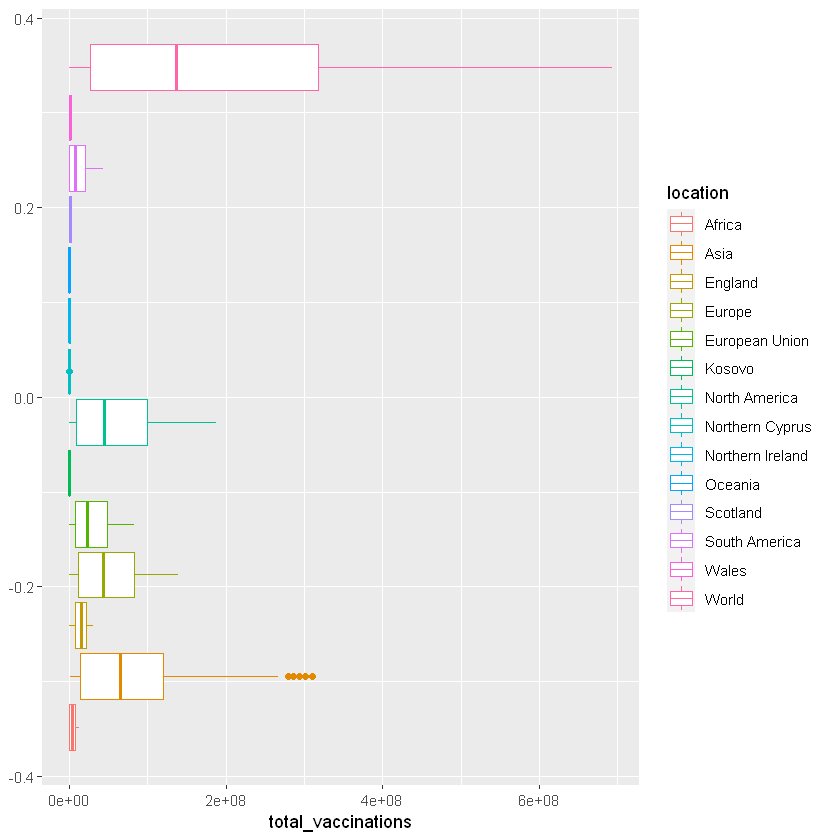

In [40]:
#covid2[str_detect(covid2$iso_code, "^OWID_.*"),]
covid.continents <- covid2[grepl("^OWID_.*", covid2$iso_code),] #these two lines are equivalent, see the documentation
#covid.continents #^OWID_.* means: match any line starting with OWID_ followed by any character (.) 0 or more times (*)
g <- ggplot(data = covid.continents, aes(x = total_vaccinations, col = location)) + geom_boxplot()
g

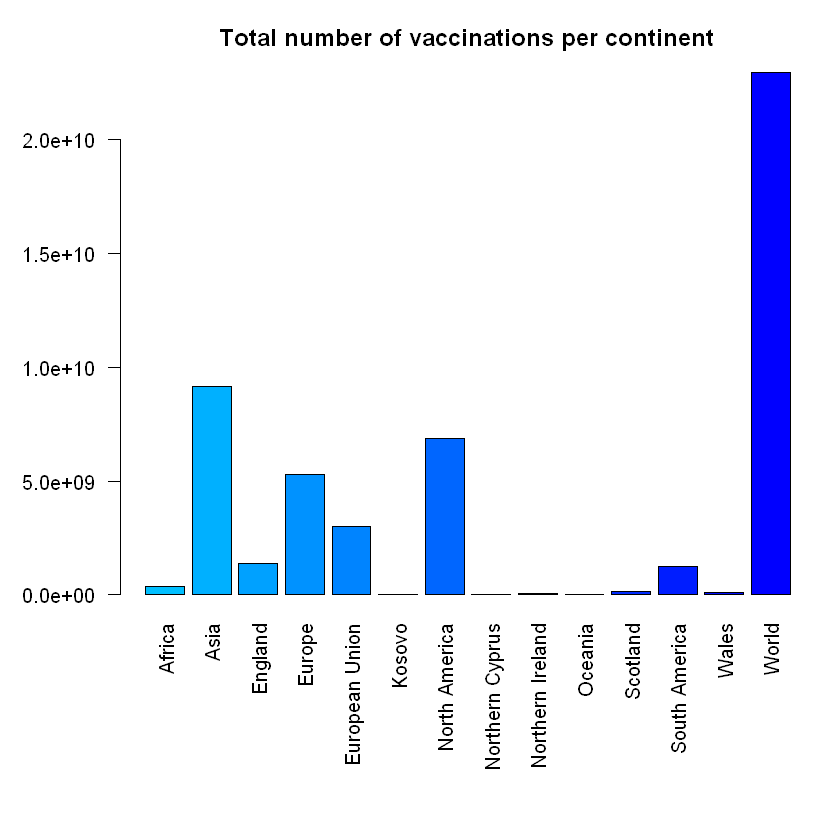

In [42]:
#alternative plot
covid.continents$total_vaccinations[is.na(covid.continents$total_vaccinations)] <- 0
#we remove NA's in order to have a well behaved sum below
covid.continents.barplot <- aggregate(covid.continents$total_vaccinations, by = list(covid.continents$location), FUN = sum)

# we change column names to make everything easier to read
names(covid.continents.barplot) <- c("location","total_vaccinations")

par(mar = c(10, 5, 3, 1)) #to make things easier to read in the x axis

pal <- colorRampPalette(colors = c("deepskyblue", "blue"))(14)
barplot(height = covid.continents.barplot$total_vaccinations , names = covid.continents.barplot$location, las = 2, col = pal) #las=2 --> labels are orthogonal to the axis
title("Total number of vaccinations per continent")